In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# read data from excel file
folder_name = '18052021_pos5'
all_cells = pd.read_excel (folder_name + '/cell_export.xls', sheet_name='Frame 0')
SOP_cells = pd.read_excel (folder_name + '/CellColorTag_SOPs_tracked.xls', sheet_name='Frame 0')
edges = pd.read_excel (folder_name + '/graph_edges.xls', sheet_name='Frame 0')

all_cells.head()



,id,x,y,polygonNo,area,voronoiArea,ellipseMajorAxisLength,ellipseMinorAxisLength,ellipseMajorAxisAngle,hasObservedDivsion,divisionTime,hasObservedElimination,eliminationTime,onSegmentationBoundary
0,0,6.692308,283.719921,1,84.5,-1.0,10.600660,9.969085,59.953080,False,-1,False,-1,True
1,1,9.798969,99.675258,1,97.0,-1.0,13.925298,8.869055,122.167854,False,-1,False,-1,True
2,2,9.893179,144.063063,2,129.5,-1.0,14.519925,11.399587,35.566075,False,-1,False,-1,True
3,3,10.476636,249.979751,3,107.0,-1.0,13.269364,10.267005,138.292074,False,-1,False,-1,True
4,4,11.949341,185.764944,1,164.5,-1.0,16.206627,12.962878,109.963423,False,-1,False,-1,True


In [5]:
SOP_cells.head()

,colorTag,id,x,y,polygonNo,area,voronoiArea,ellipseMajorAxisLength,ellipseMinorAxisLength,ellipseMajorAxisAngle,hasObservedDivsion,divisionTime,hasObservedElimination,eliminationTime,onSegmentationBoundary
0,green,36,58.677362,310.293523,7,280.5,230.458356,25.923593,13.703110,79.156574,False,-1,False,-1,False
1,green,89,108.147044,278.285147,8,335.5,217.006269,26.228768,16.262115,135.231999,False,-1,False,-1,False
2,green,92,111.018300,158.000282,10,592.0,340.701529,29.950827,25.081489,170.475148,True,1,False,-1,False
3,green,141,145.774854,265.023067,7,513.0,280.080968,26.597827,24.557340,103.736654,False,-1,False,-1,False
4,green,145,148.042707,155.256794,7,300.5,206.830003,20.211339,19.087878,22.141185,False,-1,False,-1,False


In [3]:
edges.head(10)

,Target id,Source id,Edge id (Cantor pairing)
0,0,6,27
1,1,9,64
2,2,12,117
3,2,8,63
4,3,10,101
5,3,16,206
6,3,5,41
7,4,14,185
8,5,16,247
9,5,24,459


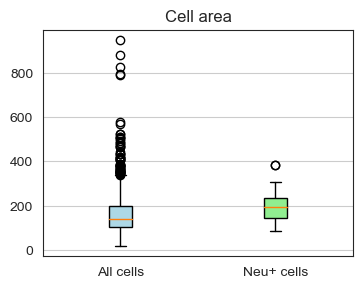

In [5]:
# box and whiskers of cell area 
area_SOP = SOP_cells['area'].to_numpy()
area_all = all_cells['area'].to_numpy()
data = [area_all, area_SOP]

fig1, ax1 = plt.subplots(figsize=(4, 3), dpi=100)
ax1.set_title('Cell area')
bplot = ax1.boxplot(data, patch_artist=True)
plt.xticks([1, 2], ['All cells', 'Neu+ cells'])
sns.set_style("white")
ax1.yaxis.grid(True)

# fill with colors
colors = ['lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
# save figure
plt.savefig(folder_name + "/plots/Cell_area.png", dpi=300, bbox_inches='tight')

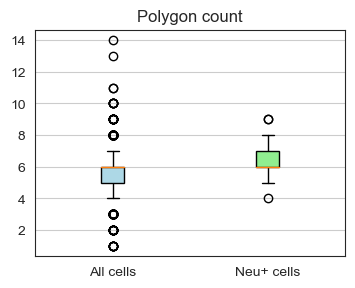

In [6]:
# box and whiskers of number neighbours (polygonNo)
polyg_SOP = SOP_cells['polygonNo'].to_numpy()
polyg_all = all_cells['polygonNo'].to_numpy()
data_polyg = [polyg_all, polyg_SOP]

fig1, ax1 = plt.subplots(figsize=(4, 3), dpi=100)
ax1.set_title('Polygon count')
bplot = ax1.boxplot(data_polyg, patch_artist=True,)
plt.xticks([1, 2], ['All cells', 'Neu+ cells'])
sns.set_style("white")
ax1.yaxis.grid(True)

# fill with colors
colors = ['lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
# save figure
plt.savefig(folder_name + "/plots/PolygonNo.png", dpi=300, bbox_inches='tight')

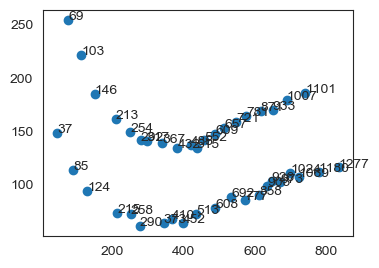

In [7]:
# show positions of SOPs and their IDs
X_SOP = SOP_cells['x'].to_numpy()
Y_SOP = SOP_cells['y'].to_numpy()

IDs_SOP = SOP_cells['id'].to_numpy()

fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
ax.scatter(X_SOP, Y_SOP)


for i, txt in enumerate(IDs_SOP):
    ax.annotate(txt, (X_SOP[i], Y_SOP[i]))

In [16]:
# Split data into TOP and BOTTOM rows
cutoff_cell = 85
cutoff_id = IDs_SOP.tolist().index(cutoff_cell)
print (Y_SOP[cutoff_id])
top_IDs = [IDs_SOP[i] for i in range(len(IDs_SOP)) if Y_SOP[i]> Y_SOP[cutoff_id]]
bottom_IDs = [IDs_SOP[i] for i in range(len(IDs_SOP)) if Y_SOP[i]<= Y_SOP[cutoff_id]]


print (top_IDs)
print (bottom_IDs)

print(len(top_IDs), len(bottom_IDs))

113.39598997493734
[37, 69, 103, 146, 213, 254, 292, 317, 367, 432, 485, 515, 552, 609, 657, 721, 781, 871, 933, 1007, 1101, 1277]
[85, 124, 215, 258, 290, 373, 410, 452, 513, 608, 692, 777, 858, 903, 926, 973, 1024, 1069, 1180]
22 19


In [17]:
# If needed adjust/correct assignments

#top_IDs
bottom_IDs.insert(0, 37)
top_IDs.pop(0)

print (top_IDs)
print (bottom_IDs)

print(len(top_IDs), len(bottom_IDs))

[69, 103, 146, 213, 254, 292, 317, 367, 432, 485, 515, 552, 609, 657, 721, 781, 871, 933, 1007, 1101, 1277]
[37, 85, 124, 215, 258, 290, 373, 410, 452, 513, 608, 692, 777, 858, 903, 926, 973, 1024, 1069, 1180]
21 20


In [18]:
# create network of cell contacts

import networkx as nx
G = nx.Graph()

IDs_all = all_cells['id'].to_numpy()

tmp = edges[['Target id','Source id']]
edges_all = [tuple(x) for x in tmp.to_numpy()]

G.add_nodes_from(IDs_all)
G.add_edges_from(edges_all)

In [19]:
# calculate network distance (number of cells) and Euclidean distance between couples of SOPs

def compute_distances(positional_IDs):
    
    results = []

    for i in range(0,len(positional_IDs)-1):
        id_ = positional_IDs[i]
        other_IDs = positional_IDs[i+1:]
        shortest = {other:len(nx.shortest_path(G, source=id_, target=other)) for other in other_IDs}
        closest_neigh, n_steps = sorted(shortest.items(), key=lambda item: item[1])[0]

        pos_id = IDs_SOP.tolist().index(id_)
        pos_neigh = IDs_SOP.tolist().index(closest_neigh)

        p1 = np.array((X_SOP[pos_id] ,Y_SOP[pos_id]))
        p2 = np.array((X_SOP[pos_neigh] ,Y_SOP[pos_neigh]))
        dist = np.linalg.norm(p2-p1)
        results.append([id_,closest_neigh,n_steps,dist])
    return results


bottom_dist = compute_distances(bottom_IDs)    
top_dist = compute_distances(top_IDs)    

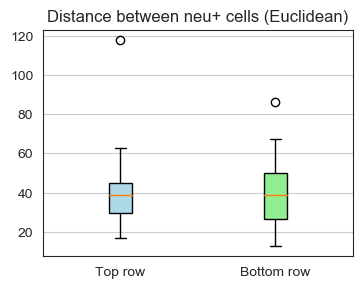

In [20]:
# box and whiskers of distances (Euclidean)
distances = [[x[3] for x in top_dist], [x[3] for x in bottom_dist]]

fig1, ax1 = plt.subplots(figsize=(4, 3), dpi=100)
ax1.set_title('Distance between neu+ cells (Euclidean)')
bplot = ax1.boxplot(distances, patch_artist=True,)
plt.xticks([1, 2], ['Top row', 'Bottom row'])
sns.set_style("white")
ax1.yaxis.grid(True)

# fill with colors
colors = ['lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# save figure
plt.savefig(folder_name + "/plots/Euclidean_dist.png", dpi=300, bbox_inches='tight')

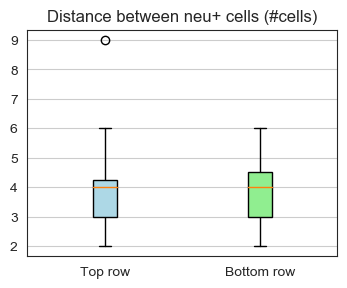

In [21]:
# box and whiskers of distances (number of cells)
distances = [[x[2] for x in top_dist], [x[2] for x in bottom_dist]]

fig1, ax1 = plt.subplots(figsize=(4, 3), dpi=100)
ax1.set_title('Distance between neu+ cells (#cells)')
bplot = ax1.boxplot(distances, patch_artist=True,)
plt.xticks([1, 2], ['Top row', 'Bottom row'])
sns.set_style("white")
ax1.yaxis.grid(True)

# fill with colors
colors = ['lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# save figure
plt.savefig(folder_name + "/plots/distance_cells.png", dpi=300, bbox_inches='tight')

In [22]:
df_top = pd.DataFrame(top_dist, columns=["id","neigh_id","dist_cell","dist_euclid"])
df_bottom = pd.DataFrame(bottom_dist, columns=["id","neigh_id","dist_cell","dist_euclid"])

# save distance data to a spreadsheet
writer2 = pd.ExcelWriter(folder_name + '/results.xlsx')

df_top.to_excel(writer2, sheet_name = 'top_row', index = False)
df_bottom.to_excel(writer2, sheet_name = 'bottom_row', index = False)

writer2.save()

In [ ]:
# Visualizing the network 
nx.draw(G, with_labels=False)